In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np

In [22]:
from keras.datasets import mnist
(train_images, train_lables), (test_images, test_lables) = mnist.load_data()

In [23]:
train_images.shape

(60000, 28, 28)

In [24]:
train_lables

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

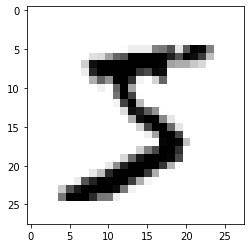

In [26]:
digit = train_images[0]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [27]:
origin_my_image = test_images[0]

In [28]:
from keras import models
from keras import layers

In [29]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,  )))
model.add(layers.Dense(256, activation= 'relu', ))
model.add(layers.Dense(128, activation= 'relu', ))
model.add(layers.Dense(64, activation= 'relu', ))
model.add(layers.Dense(32, activation= 'relu', ))
model.add(layers.Dense(16, activation= 'relu', ))
model.add(layers.Dense(10, activation= 'softmax', ))

In [30]:
model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
test_images = test_images.reshape((10000, 28* 28))
test_images = test_images.astype('float32')/255

In [33]:
from keras.utils import to_categorical
train_lables

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
train_lables = to_categorical(train_lables)
test_lables = to_categorical(test_lables)


In [35]:
model.fit(train_images, train_lables, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.3608 - accuracy: 0.8890
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.1126 - accuracy: 0.9676
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0782 - accuracy: 0.9775
Epoch 4/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0586 - accuracy: 0.9833
Epoch 5/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0463 - accuracy: 0.9868


In [36]:
test_loss, test_acc = model.evaluate(test_images, test_lables)

10000/10000 [==============================] - 1s 85us/step


In [37]:
test_acc

0.9750000238418579

In [38]:
myDigit = origin_my_image

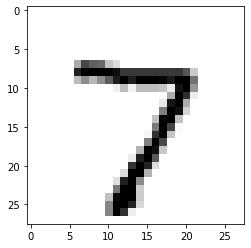

In [39]:
plt.imshow(myDigit, cmap = plt.cm.binary)

In [40]:
my_image = digit.reshape((1, 28*28))
output = model.predict(my_image)
print('result:', np.argmax(output))

result: 5
